In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
from math import pi

In [2]:
# Create circuit
circ = QuantumCircuit(3)
circ.x(0)
circ.h(1)
circ.p(-pi/4, 1)
circ.cx(0, 1)
circ.p(pi/2, 1)
circ.cx(0, 1)
circ.measure_all()
print(circ)

        ┌───┐                                ░ ┌─┐      
   q_0: ┤ X ├─────────────■──────────────■───░─┤M├──────
        ├───┤┌─────────┐┌─┴─┐┌────────┐┌─┴─┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤ P(-π/4) ├┤ X ├┤ P(π/2) ├┤ X ├─░──╫─┤M├───
        └───┘└─────────┘└───┘└────────┘└───┘ ░  ║ └╥┘┌─┐
   q_2: ─────────────────────────────────────░──╫──╫─┤M├
                                             ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════╩══╩══╩═
                                                0  1  2 


counts: {'011': 527, '001': 497}


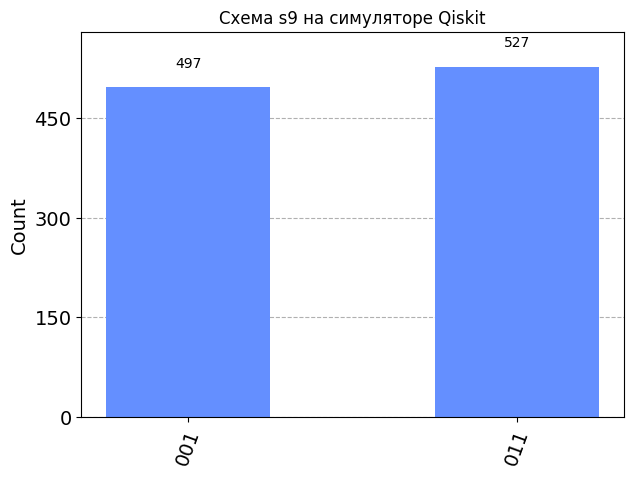

In [3]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run
result = simulator.run(circ).result()
# Get counts
counts = result.get_counts(circ)
print("counts:", counts)
plot_histogram(counts, title='Схема s9 на симуляторе Qiskit')
